# Introduction

For this second milestone in the project, we're going to perform the following preliminary tasks to evaluate the feasibility of our project:
- [x] Load and pre-process the data
- [x] Exploratory data analysis to confirm intuitive correlations between variables and define a potential main article
- [x] Define a primitive set of clichés, a performance metric and verify if the passing paths using clichés have better performance
- [x] Study a particular cliché and the categorization of the articles linked to it and our main article

In the code below, we'll mainly be using the graph data from the Wikispeedia dataset. 
In particular, we use the finished paths, a little bit the unfinished paths, the adjacency matrix and theoretical shortest paths.


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing import *
from data_quantity_analysis import *
from cliches import *
from plot_helpers import *

In [21]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Preprocessing

In [2]:
(
    articles,
    categories,
    links,
    paths_finished,
    paths_unfinished,
) = import_and_clean_data()

# Data quantity analysis - exploratory data analysis

## General 

We start by exploring the data set to get an overview of the data and the information it provides. As a first step, we're trying to create graphs that could potentially give us information about how players play and think.

As the aim of our project is to look at the role of clichés in the choice of artworks by users and, more generally, the role they play in information, we begin by looking at the sub-sets of data that contain the most information.

Here we look at the 100 most visited articles by players and then the 100 most used targets, both among the finished paths.

[('<', 16009), ('United_States', 8654), ('Europe', 4270), ('United_Kingdom', 3806), ('England', 3260), ('Earth', 3152), ('Africa', 2742), ('World_War_II', 2256), ('North_America', 1829), ('Germany', 1737), ('Animal', 1642), ('France', 1570), ('Human', 1554), ('Mammal', 1548), ('Computer', 1513), ('Science', 1453), ('Periodic_table', 1396), ('English_language', 1392), ('Brain', 1301), ('Atlantic_Ocean', 1266), ('Telephone', 1239), ('India', 1210), ('Viking', 1193), ('Bird', 1183), ('Asia', 1164), ('Asteroid', 1164), ('Agriculture', 1111), ('Plant', 1105), ('China', 1104), ('Christianity', 1052), ('Japan', 1051), ('United_Nations', 1039), ('Zebra', 1029), ('Theatre', 1027), ('Internet', 1001), ('Russia', 995), ('Australia', 980), ('Chemistry', 973), ('London', 938), ('Sun', 914), ('Canada', 897), ('South_America', 891), ('European_Union', 877), ('Adolf_Hitler', 872), ('Water', 868), ('Solar_System', 857), ('President_of_the_United_States', 833), ('Italy', 832), ('Physics', 829), ('Chemic

/Users/tudoroancea/Desktop/epfl/ma3/cs-401/ada-2023-project-abracadabra2023/data_quantity_analysis.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=article_names, y=article_counts, palette="coolwarm")


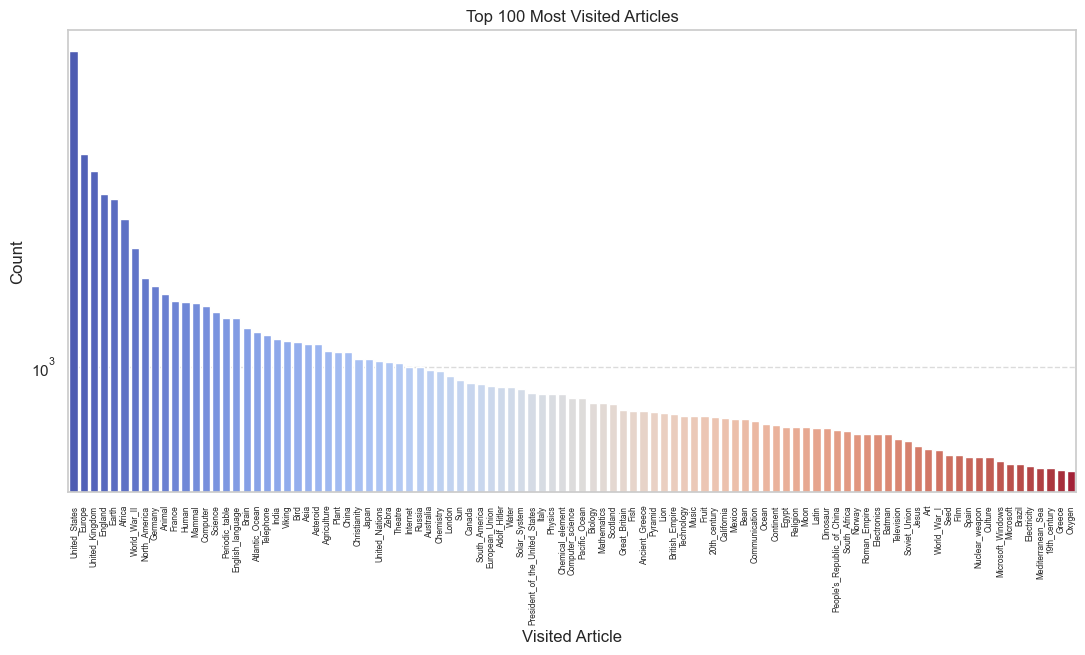

In [23]:
top_100_visited_articles(paths_finished, show=True)

/Users/tudoroancea/Desktop/epfl/ma3/cs-401/ada-2023-project-abracadabra2023/data_quantity_analysis.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_100_targets.index, y=top_100_targets.values, palette="coolwarm")


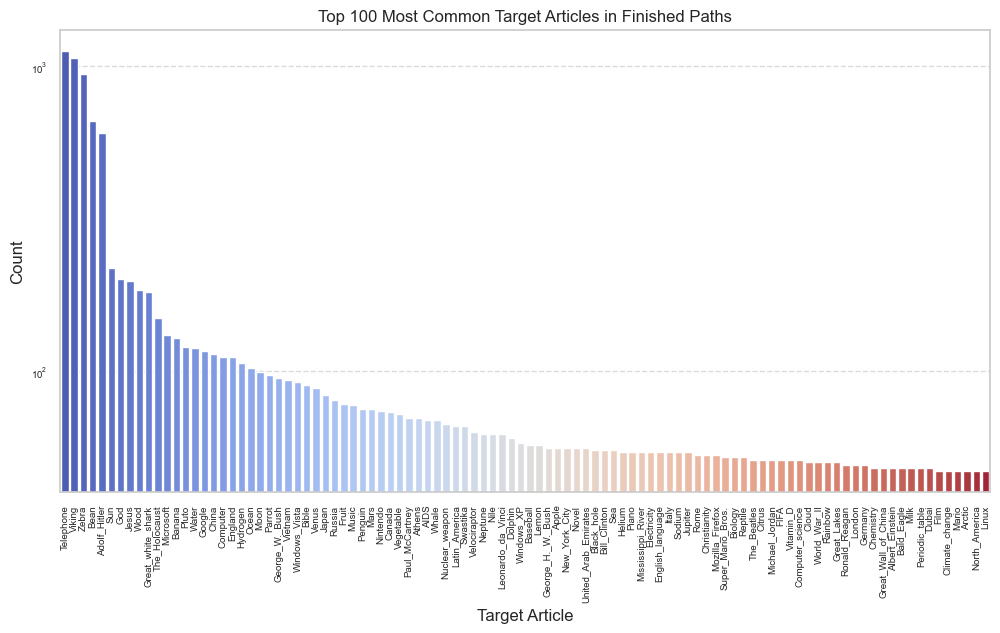

In [24]:
top_100_target_articles(paths_finished, show=True)

We then look at the distribution of the length and duration of the finished paths to see if these correspond to a normal trend or if there are particular features to be analysed.

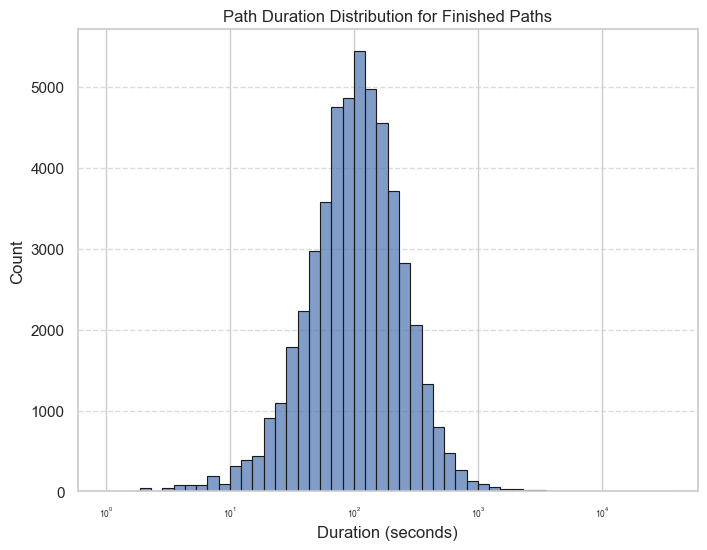

In [40]:
path_duration_distribution(paths_finished, show=True)

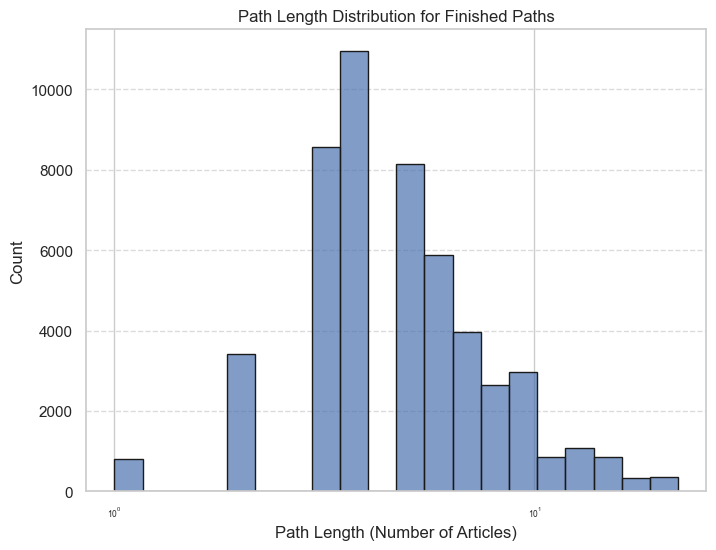

In [41]:
path_length_distribution(paths_finished, show=True)

Now that we've looked at distributions with a single valuer, we'll look at the links between several valuers: in particular, we'll look at the interaction between the length of the path and the length of the game's duration, and then the interaction between the score given to the chmin and its length.

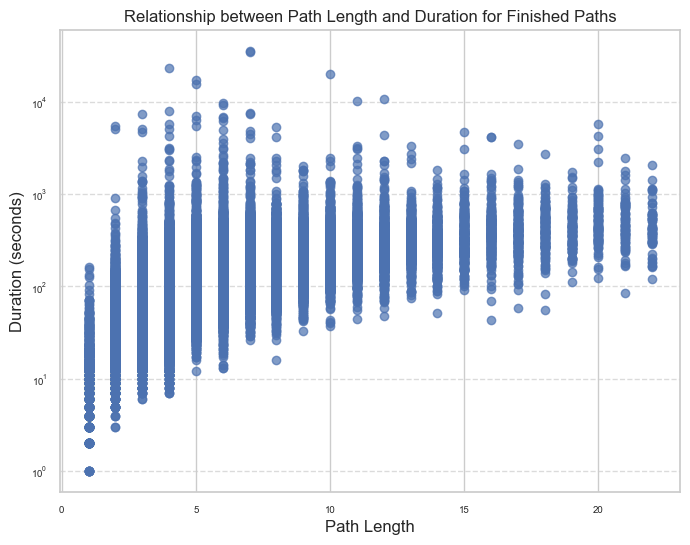

In [27]:
path_length_vs_duration(paths_finished, show=True)

<Figure size 1000x900 with 0 Axes>

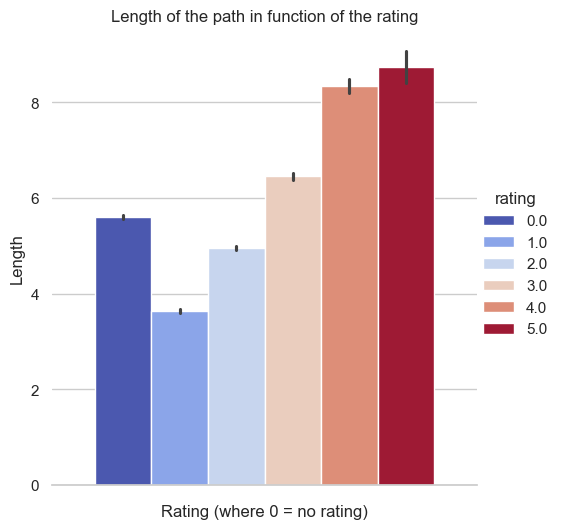

In [28]:
rating_vs_path_length(paths_finished, show=True)

Based on the previous two plots, we could hypothesize that the length of the path is correlated to the duration of the game and its rating, simply based on the apparent monotonicity of the data.
Both these interpretations are intuitive but we should perform a statistical regressions and tests to confirm them.

We may be interested in another more objective metrics. In other word, we try to compare how the difference between the actual path taken and the shortest (theoretical) path behaves with respect to the rating given.

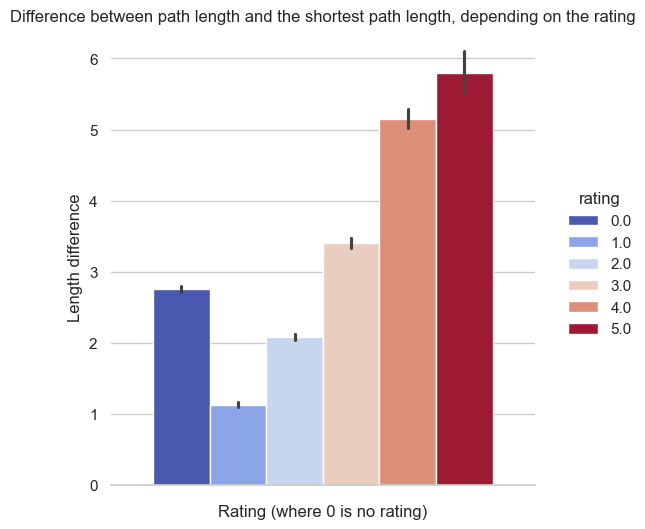

In [48]:
ax = sns.catplot(
    data=paths_finished,
    y="diff_length",
    kind="bar",
    palette="coolwarm",
    hue="rating",
)
ax.despine(left=True)
plt.title("Difference between path length and the shortest path length, depending on the rating")
plt.xlabel("Rating (where 0 is no rating)")
plt.ylabel("Length difference")
plt.show()

Again, there seems to be some difference between the difference of length of paths for different ratings. Notice that compared to the path lengths for different rating, the difference between rating 4 vs 5 in more siginificant in the plot of difference in length. Indeed, the error bars do not overlap in these ratings.

For this reason, we will choose this difference between the path length and the shortest path length as our performance metric.

## Specific example: the United Kingdom

Now that we've looked at the data as a whole, let's take a closer look at one data set in particular, that of United Kingdom. This will allow us to define a set of snapshots for this particular area. We've decided to use United Kingdom as an example because it's one of the most visited items in the dataset and as one of our european neighbors, we can easily find clichés that are true.

In [29]:
main_article = "United_Kingdom"

In [30]:
count_in_out_neighbors(paths_finished, paths_unfinished, main_article)

Number of paths finished that contain United Kingdom: 3732
Number of paths unfinished that contain UnitedKingdom 1354
Number of paths that finished with United Kingdom: 28


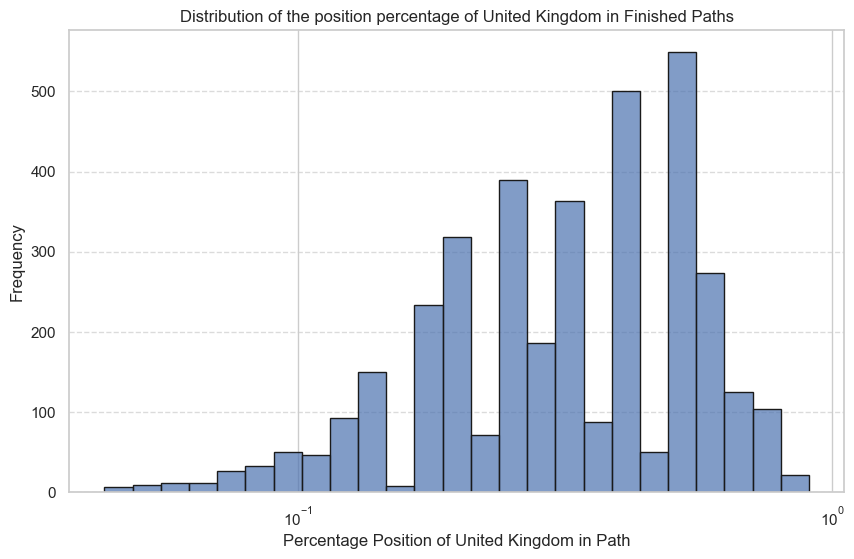

In [31]:
distribution_position_percentage(paths_finished, main_article, show=True)

In generality, we can't really infer any particular distribution from the data. However, in future analysis we could try to fit distributions when we consider the position of the main article conditonally on additional events (e.g. the path also contains a particular cliché).

In [44]:
# define main_article for analysis: 
main_article = "United_Kingdom"

# only keep rows such that main_article in path
around_main_article = get_df_main_article(paths_finished, main_article=main_article).copy(deep=True)

# get category of the main_article
around_main_article["main_article_category"] = around_main_article["path"].apply(lambda path: get_category_main_article(main_article, path, categories))

# article juste before/just after main_article
# TODO: function to be improved/discussed. What do we want to do with "<"?
around_main_article["around_path"] = around_main_article["path"].apply(
    lambda path: get_index_main_article_in(main_article, path)
)

# update initial/target_article, initial/target_category
around_main_article["around_IA"] = around_main_article["around_path"].apply(
    lambda path: path[0]
)
around_main_article["around_TA"] = around_main_article["around_path"].apply(
    lambda path: path[-1]
)
around_main_article["around_IC"] = around_main_article["around_IA"].apply(
    lambda article: categories[categories["article"] == article]["category1"].values
)
around_main_article["around_TC"] = around_main_article["around_TA"].apply(
    lambda article: categories[categories["article"] == article]["category1"].values
)

around_main_article

,hashedIpAddress,timestamp,durationInSec,path,rating,path_length,shortest_path,diff_length,main_article_category,around_path,around_IA,around_TA,around_IC,around_TC
74,565e6dc60eeca66c,1253358736,77,"[Aberdeen, City_status_in_the_United_Kingdom, ...",0.0,5,3,2,[Geography],"[Aberdeen, City_status_in_the_United_Kingdom, ...",Aberdeen,Market,[Geography],[Business_Studies]
113,4dc8af51482ebb5a,1336876538,221,"[Achilles, Ethiopia, United_Kingdom, World_War...",3.0,4,2,2,"[Countries, Geography, Geography]","[Ethiopia, United_Kingdom, World_War_II]",Ethiopia,World_War_II,"[Geography, Countries]",[History]
115,0adc390d00c8c538,1344743190,63,"[Achilles, Greek_mythology, Ancient_Greece, Eu...",3.0,6,2,4,"[Countries, Geography, Geography]","[Europe, United_Kingdom, Prime_Minister_of_the...",Europe,Prime_Minister_of_the_United_Kingdom,[Geography],[Citizenship]
117,31980f901eee5467,1346717015,117,"[Achilles, Ethiopia, United_Kingdom, World_War...",0.0,4,2,2,"[Countries, Geography, Geography]","[Ethiopia, United_Kingdom, World_War_II]",Ethiopia,World_War_II,"[Geography, Countries]",[History]
121,3a11233c52f824f8,1350896212,224,"[Achilles, William_Shakespeare, England, Great...",0.0,7,2,5,"[Countries, Geography, Geography]","[<, United_Kingdom, World_War_II]",<,World_War_II,[],[History]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51280,6f4978c43a8faffd,1358871308,164,"[Timken_1111, Chicago, Roman_Catholic_Church, ...",0.0,5,4,1,"[History, People]","[Industrial_Revolution, George_III_of_the_Unit...",Industrial_Revolution,British_monarchy,[History],[Citizenship]
51287,4e3201ac6a75f14f,1324457682,150,"[Tropical_Storm_Larry_(2003), Pacific_Ocean, U...",3.0,8,3,5,"[Countries, Geography, Geography]","[Pacific_Ocean, United_Kingdom, England]",Pacific_Ocean,England,[Geography],[Geography]
51299,3cc4f2837bf22048,1325177555,59,"[Union_Station_(San_Diego), World_War_II, Unit...",0.0,4,2,2,"[Countries, Geography, Geography]","[World_War_II, United_Kingdom, England]",World_War_II,England,[History],[Geography]
51301,3278e904185ec5bc,1361584612,168,"[Valparaíso, World_Heritage_Site, Europe, <, U...",0.0,10,3,7,"[Countries, Geography, Geography]","[<, United_Kingdom, United_Nations]",<,United_Nations,[],[Citizenship]


/Users/tudoroancea/Desktop/epfl/ma3/cs-401/ada-2023-project-abracadabra2023/plot_helpers.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


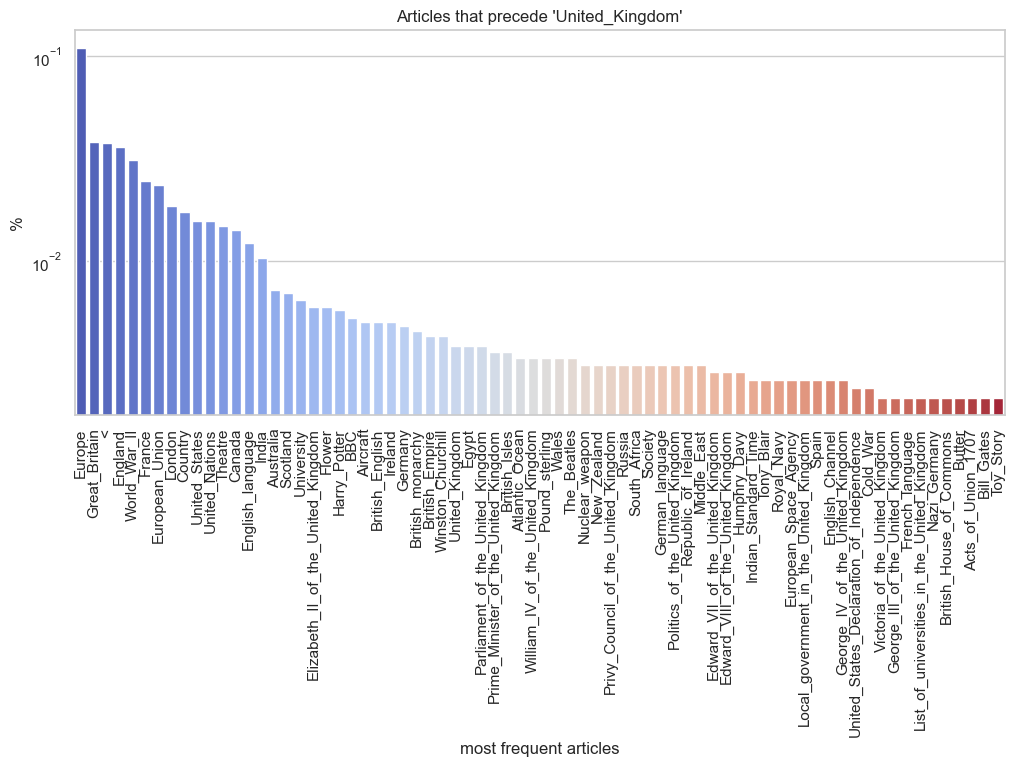

In [33]:
# keep only 10% most frequent articles just after main_article
most_frequent_before = around_main_article["around_IA"].value_counts(normalize=True)
plot_most_frequent_articles(most_frequent_before, "precede");

/Users/tudoroancea/Desktop/epfl/ma3/cs-401/ada-2023-project-abracadabra2023/plot_helpers.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


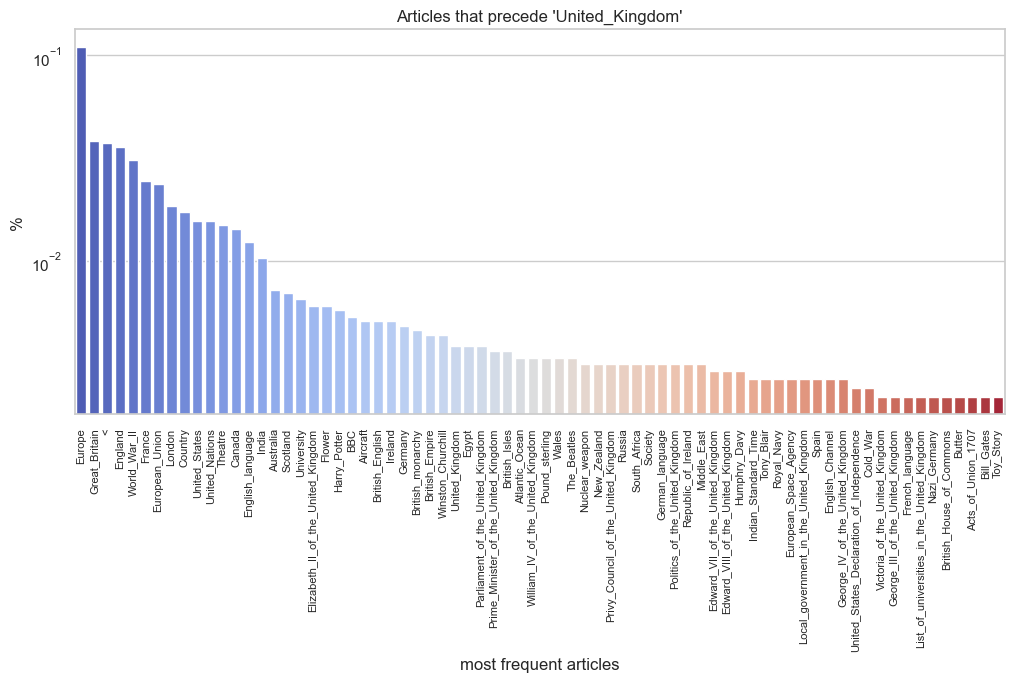

In [34]:
# keep only 10% most frequent articles just after main_article
most_frequent_before = around_main_article["around_IA"].value_counts(normalize=True)
plot_most_frequent_articles(most_frequent_before, "precede");

# Define our cliches 

## Cliches preprocessing

In this section we will define and extract data from the clichés. This will enable us to carry out analyses to discover whether or not there are any links between our chosen subject and the clichés.

## Statistical tests for difference of path length for different cliches

Now, we want to find some statistical evidence of whether clichés influence the length of the path from the initial article to the target article. From the previous exploration, it seems that the difference of path length between the actual path taken and the shortest (theoretical) path is a "good" metric of the player's performance.

So the idea is to select all the rows in `paths_finished` that contain the main article `United_Kingdom`. The selection of clichés remains to be done in an unbiased way. For now, we select "cliché" articles from the plots just above (see selected cliché articles below)[^1]. Next, it makes sense to compare difference in length for a given rating. Otherwise, as stated earlier, "harder" articles seem to tend to have higher difference in length and hence we would be comparing different categories.

To check whether there is a statistical difference, we compute a Welch's t-test. Indeed, given a rating, we assume that our observations are independant. Additionally, it seems that the difference in length among a rating between those who went through cliché articles and those who did not do not have same variance. 

[^1]: We are looking into different ways to retrieve cliché articles.

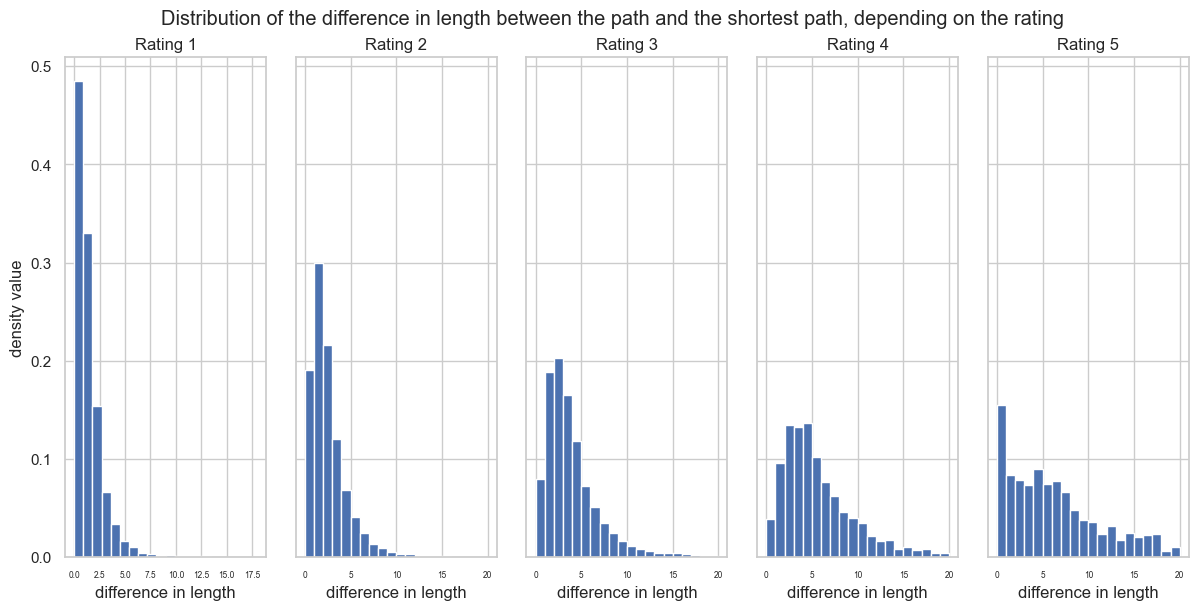

In [51]:
fig, axes = plt.subplots(1, 5, figsize=(12, 6), sharey=True)
fig.tight_layout()

for i, ax in enumerate(axes):
    temp = paths_finished[paths_finished["rating"] == i + 1]["diff_length"]
    ax.hist(temp, bins=20, density=True)
    ax.set_xlabel("difference in length")
    if i == 0:
        ax.set_ylabel("density value")
    ax.set_title(f"Rating {i+1}")

# make room for suptitle
fig.subplots_adjust(top=0.9)
fig.suptitle(
    "Distribution of the difference in length between the path and the shortest path, depending on the rating"
)

plt.show()

We observe that the higher the rating, the higher the variance. Additionally, it is worth noting that the data is imbalanced among the ratings.

Above, we have compared the variance between different ratings but not among a rating between the paths that go through cliché articles and those that do not. 

In [41]:
# select some cliches
main_article_cliches = [
    "William_Shakespeare",
    "Harry_Potter",
    "BBC",
    "Winston_Churchill",
    "The_Beatles",
    "Elizabeth_II_of_the_United_Kingdom",
    "Flower",
    "British_monarchy",
    "British_Empire",
    "Prime_Minister_of_the_United_Kingdom",
    "Pound_sterling",
    "London",
]

ratings = np.arange(1, 6, dtype=int)

In [45]:
from cliches import test_difference_path_length_cliche

# create dataframe
test_cliche = pd.DataFrame(
    columns=[
        "main_article",
        "cliche",
        "rating",
        "mean_cliche",
        "mean_nocliche",
        "shape_cliche",
        "shape_nocliche",
        "statistic",
        "p_value",
    ]
)

# test different ratings and cliches
for rating in ratings:
    for cliche in main_article_cliches:
        (
            stat,
            p,
            mean_path_cliche,
            mean_path_nocliche,
            shape_cliche,
            shape_nocliche,
        ) = test_difference_path_length_cliche(
            paths_finished, rating, cliche, main_article, False, False
        )
        test_cliche.loc[test_cliche.shape[0]] = [
            main_article,
            cliche,
            rating,
            mean_path_cliche,
            mean_path_nocliche,
            shape_cliche,
            shape_nocliche,
            stat,
            p,
        ]

test_cliche

c:\Users\marti\Desktop\EPFL\MA1\CS-401_ADA\ada-2023-project-abracadabra2023\cliches.py:123: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  # ttest
c:\Users\marti\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\marti\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\marti\Desktop\EPFL\MA1\CS-401_ADA\ada-2023-project-abracadabra2023\cliches.py:123: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  # ttest
c:\Users\marti\anaconda3\lib\site-packages\scipy\sta

,main_article,cliche,rating,mean_cliche,mean_nocliche,shape_cliche,shape_nocliche,statistic,p_value
0,United_Kingdom,William_Shakespeare,1,NaN,1.400332,"(0, 8)","(602, 8)",NaN,NaN
1,United_Kingdom,Harry_Potter,1,NaN,1.400332,"(0, 8)","(602, 8)",NaN,NaN
2,United_Kingdom,BBC,1,NaN,1.400332,"(0, 8)","(602, 8)",NaN,NaN
3,United_Kingdom,Winston_Churchill,1,NaN,1.400332,"(0, 8)","(602, 8)",NaN,NaN
4,United_Kingdom,The_Beatles,1,NaN,1.400332,"(0, 8)","(602, 8)",NaN,NaN
5,United_Kingdom,Elizabeth_II_of_the_United_Kingdom,1,NaN,1.400332,"(0, 8)","(602, 8)",NaN,NaN
6,United_Kingdom,Flower,1,NaN,1.400332,"(0, 8)","(602, 8)",NaN,NaN
7,United_Kingdom,British_monarchy,1,NaN,1.400332,"(0, 8)","(602, 8)",NaN,NaN
8,United_Kingdom,British_Empire,1,NaN,1.400332,"(0, 8)","(602, 8)",NaN,NaN
9,United_Kingdom,Prime_Minister_of_the_United_Kingdom,1,NaN,1.400332,"(0, 8)","(602, 8)",NaN,NaN


Notice that those going through the article `London` are *almost* statistically significantly (at $\alpha=0.05$) more performant that others.

# Categories and clichés

We consider here the finished paths passing through our chosen main article "United_Kingdom".
We enumerate all the categories of the articles at most 3 steps away from the main article on these paths and construct a bar chart to visualize their number of occurences.
We further color each category bar depending on whether "United_Kingdom" belongs to it or not.
Finally, arrows are used to indicate specific categories of a given cliché (here “William_Shakespeare”, drawn from the list created in the previous section). 

In [37]:
all_categories, subcategories1, subcategories2, subcatgeories3 = separate_categories(main_article, categories)

Non-coincide Categories at 1 step away from UK: [('United_Kingdom', 'African_Countries'), ('United_Kingdom', 'History'), ('United_Kingdom', 'British_History'), ('United_Kingdom', 'British_History_Post_1900'), ('United_Kingdom', 'Citizenship'), ('United_Kingdom', 'Politics_and_government'), ('United_Kingdom', 'African_Geography'), ('United_Kingdom', 'African_Countries'), ('United_Kingdom', 'History')]
Non-coincide Categories at 2 steps away from UK: [('United_Kingdom', 'Ancient_History_Classical_History_and_Mythology'), ('United_Kingdom', 'African_Geography'), ('United_Kingdom', 'African_Countries'), ('United_Kingdom', 'History'), ('United_Kingdom', 'British_History'), ('United_Kingdom', 'British_History_Post_1900'), ('United_Kingdom', 'History'), ('United_Kingdom', 'British_History'), ('United_Kingdom', 'British_History_Post_1900')]
Non-coincide Categories at 3 steps away from UK: [('United_Kingdom', 'Ancient_History_Classical_History_and_Mythology'), ('United_Kingdom', 'African_Geogra

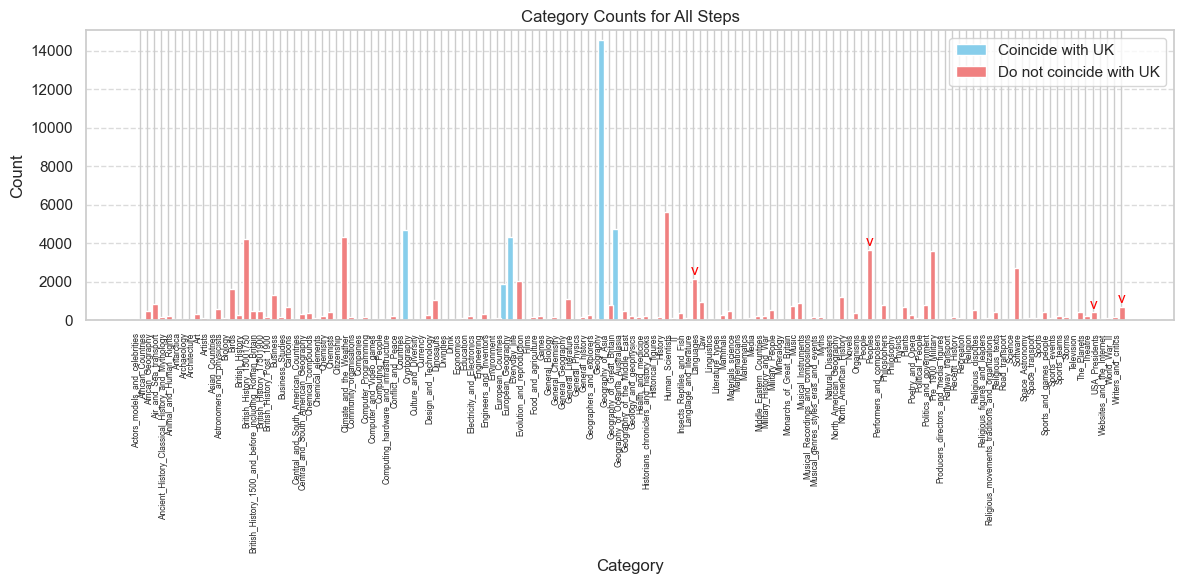

In [42]:
combine_results(paths_finished, main_article, categories, all_categories, ["category1", "category2", "category3"])

This bar plot shows that:
- the categories that "United_Kingdom" belongs to are (among) the most frequent ones, which is not surprising given that the hyperlinks in an article should redirect to related articles, and given that the players often rely on semantic links to find the target article.
- if we look at the categories of our designated cliché "William_Shakespeare", they are quite frequent, although not coinciding with the "United_Kingdom"'s catgeories. This is not surprising either, because of the very nature of the two articles: one of them is a country, the other one is a playwright. However, we can see that the categories of "William_Shakespeare" are quite frequent, which is a good sign for our project.